In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import warnings
warnings.filterwarnings("ignore")

In [3]:
symbol = 'GOOGL'
start = '2021-01-01'
end = '2021-12-31'
df1 = web.DataReader(symbol,"yahoo",start,end)

df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,87.875000,86.804497,86.863503,87.632004,21070000,87.632004
2021-01-04,88.124496,85.357002,88.000000,86.306503,37324000,86.306503
2021-01-05,87.341499,85.845001,86.254501,87.002502,20360000,87.002502
2021-01-06,87.198502,84.805000,85.013000,86.143997,46588000,86.143997
2021-01-07,88.890999,86.337997,86.337997,88.717003,41936000,88.717003


In [5]:
df1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,125.107587,122.890682,123.998186,124.080251,3.047661e+07,124.080251
std,18.464767,18.405724,18.540884,18.439640,1.275316e+07,18.439640
min,87.198502,84.805000,85.013000,86.143997,1.430200e+07,86.143997
25%,111.400002,107.260498,107.357498,110.012497,2.209800e+07,110.012497
50%,125.403999,123.059502,123.150002,124.578003,2.710000e+07,124.578003
75%,142.417496,140.401505,141.614502,141.606995,3.459400e+07,141.606995
max,150.966507,148.899002,149.975494,149.838501,9.788200e+07,149.838501


In [11]:
high = 140
low = 120

In [14]:
# As default, set everything to 0
df1['Signal'] = 0
 
# If stock is more than 140, and we set the signal to -1 which means: 'short'
df1.loc[df1['Adj Close'] > high, 'Signal'] = -1
 
# If stock is less than 120, and we set the signal to 1 which means: 'long'
df1.loc[df1['Adj Close'] < low, 'Signal'] = 1
 
buys = df1.loc[df1['Signal'] == 1]
sells = df1.loc[df1['Signal'] == -1]

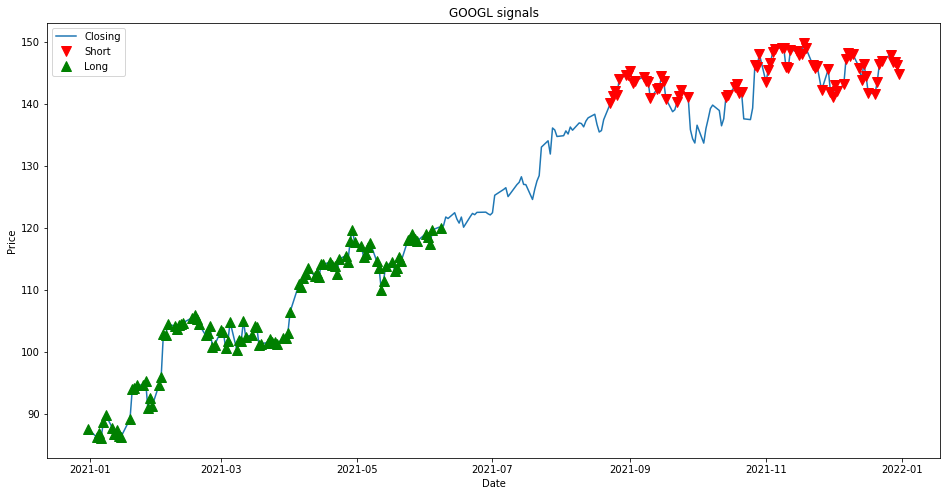

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df1.index, df1['Adj Close'], label='Closing')
plt.plot(sells.index, df1.loc[sells.index]['Adj Close'],'v', markersize=10, color='r', label='Short')
plt.plot(buys.index, df1.loc[buys.index]['Adj Close'], '^', markersize=10, color='g', label='Long')
plt.title(symbol + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()